# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from surface import *
from caustiques import *

import cProfile
import pstats

profiler = cProfile.Profile()



## Initialisations

In [2]:
direction = np.array([0, 0, -1])  # direction de la lumière


rayons = []
for i in range(Nx-1):
    rayons.append([])
    for j in range(Ny-1):
        rayons[i].append(Rayon(np.array([(i+1/2)*dx, (j+1/2)*dy, 2*H]), direction, 1))


### Spectre de Phillips

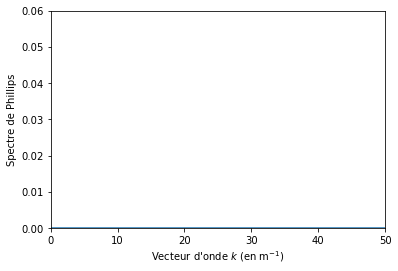

6.049251153186726e-20


In [13]:
vals_k_spectre = np.linspace(0, 0.5, 200)
spectre = [spectre_Phillips(kx, 0) for kx in vals_k_spectre]

plt.xlim(0, 0.5)
plt.ylim(0, 6)

plt.xlabel(r"Vecteur d'onde $k$ (en m$^{-1})$")
plt.ylabel(r"Spectre de Phillips")

plt.plot(vals_k_spectre, spectre)
plt.savefig("spectre Phillips.pdf")
plt.show()


### Surface initiale

In [4]:
surface = np.zeros((Nx, Ny))
amplitude_fourier_plus = np.zeros((Nx, Ny), dtype=complex)
amplitude_fourier_moins = np.zeros((Nx, Ny), dtype=complex)

for i in range(Nx):
    for j in range(Ny):
        kx = vals_kx[i]
        ky = vals_ky[j]
        amplitude_fourier_plus[i, j] = random_amplitude_fourier_plus(kx, ky, spectre_Phillips)

        amplitude_fourier_moins[i, j] = np.conjugate(amplitude_fourier_plus[-i, -j])


update_surface(surface, 0, amplitude_fourier_plus, amplitude_fourier_moins)


## Calculs

In [5]:
profiler.enable()

trajectoires = calcul_trajectoires(rayons, surface, 0, amplitude_fourier_plus, amplitude_fourier_moins)

profiler.disable()



Calcul des trajectoires :   0%|          | 0/255 [00:00<?, ?it/s]c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum\PhyNum Projet\PhyNum-Piscine\raytracing.py:183: RuntimeWarning: invalid value encountered in double_scalars
  return 1/2*((np.sin(theta_r-theta_i)**2)/(np.sin(theta_i+theta_r)**2) + (np.tan(theta_r-theta_i)**2)/(np.tan(theta_i+theta_r)**2))
Calcul des trajectoires :  27%|██▋       | 69/255 [00:07<00:20,  8.88it/s]


KeyboardInterrupt: 

### Profiling

In [ ]:
# stats = pstats.Stats(profiler).sort_stats("cumtime")
# stats.print_stats()


In [ ]:
motif = calcul_motifs(rayons)

# image = motif_to_alpha(motif)
# plt.imsave(f"images/caustiques {Nx=} {H=}.png", image)

image = motif
plt.imsave(f"images/caustiques {Nx=} {H=}.png", image, cmap="gray")


## Affichage

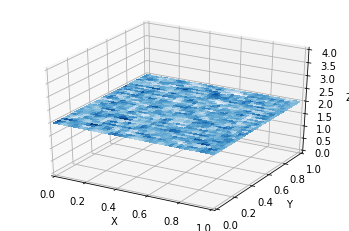

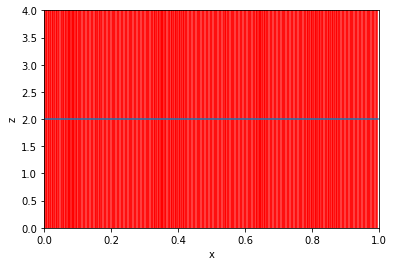

c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\ma\core.py:709: UserWarning: Warning: converting a masked element to nan.

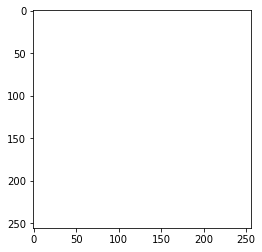

In [ ]:
plot_surface(surface)
plt.show()


affiche_rayons(rayons, surface, save=True)
plt.show()


plt.imshow(motif, cmap="gray")
plt.show()


In [ ]:
genere_animation(surface, amplitude_fourier_plus, rayons, save_motif=True)


frame:   0%|          | 0/20 [00:00<?, ?it/s]c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum\PhyNum Projet\PhyNum-Piscine\raytracing.py:183: RuntimeWarning: invalid value encountered in double_scalars
  return 1/2*((np.sin(theta_r-theta_i)**2)/(np.sin(theta_i+theta_r)**2) + (np.tan(theta_r-theta_i)**2)/(np.tan(theta_i+theta_r)**2))
frame:  20%|██        | 4/20 [01:32<06:13, 23.33s/it]